### <p style="background-color:#627D50;color:#D1CABD;font-size:110%;text-align:center;border-radius:20px 60px;  border: 10px solid #cfcfcf;  padding-top: 10px;  padding-left: 10px;  padding-right: 10px; padding-bottom: 10px;  border-radius: 80px 20px;line-height: 1.2em; margin-bottom: 10px;"> **Projet 5** : Segmentez des clients d'un site e-commerce </p>

<img src="Olist.png" align="left" alt="Alternative text" />

Vous êtes consultant pour ***Olist***, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

***Olist*** souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu'elles pourront utiliser au quotidien pour leurs campagnes de communication.

Votre ***objectif*** est de comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles.

---
- Mentor [**Babou M'BAYE**]()
- Etudiant [**Bourama FANE**](https://www.linkedin.com/in/bourama-fan%C3%A9-7aba41141/)
- Parcours [*Data Scientiste*]()
- Ecole [*OpenClassrooms*]()

---

## <a id='-1'> <font color='#114b98' font-size='110%' text-align='left'> Sommaire </font> </a>
----------

[<font color="#337da4"> <h5> 1. Contexte](#1)</h5>
[<font color="#337da4"> <h5> 2. Chargement des bases](#2)</h5>
[<font color="#337da4"> <h5> 3. Période de reference](#3)</h5>

> [3.1. Selection de variables pertinentes](#3.1)<br>
> [3.2. Clustering](#3.2)<br>  
> [3.3. DBSCAN](#3.3)<br>
> [3.4. Hierarchical Clustering (Agglomerative)](#3.4)<br>
> [3.5. Comparaison des modèles ](#3.5)<br>
> [3.6. Clustering retenu](#3.6)<br> 

[<font color="#337da4"> <h5> 4. Stabilité à l'initialisation du K-Means](#4)</h5>


### <font color="#337da4" id="0"> Librairies </font>
----------------------------

In [1]:
# Manipulations des données
import numpy as np
import pandas as pd
import datetime as dt

# Représentations graphiques
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objects as go

# Traitement des textes
import textwrap

# Management des fichiers
import os

# Management des alertes
import warnings
warnings.filterwarnings("ignore") # Ignorer des warnings pour avoir un script plus propre.

# Graphiques intéractives
# import ipympl 
# import ipywidgets as widgets

%matplotlib inline

In [2]:
# Pour prendre en compte le temps de calcul
import time

# Sélection des variables d'entrée (analyses de la dataset)
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.feature_selection import SelectKBest, RFE, RFECV, f_classif

# sklearn metrics pour quantifier la qualité des modèles
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score

# sklearn pipeline
from sklearn.pipeline import Pipeline  # pour effectuer des pipelines

# sklear impute pour effectuer des imputation de valeurs manquantes
from sklearn.impute import SimpleImputer

# sklearn numerical or categorical preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.compose import ColumnTransformer

# rajout de nouvelles variables
from sklearn.preprocessing import PolynomialFeatures

# sklearn text preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# image and video preprocessing  next

# Pour séparer train/test et faire des validations croisées et des stratification ainsi que des grilles de recherches
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# Pour faire un over sampling et équilibrer les lables
from imblearn.pipeline import Pipeline as Imb_Pipeline
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTE

# Pour effectuer une PCA avant le modèle
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD  # si vous avez trop de 0 dans votre dataset

# Modèles de clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN  # si le kmeans prend trop de temps
from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Pour choisir le meilleur nombre de clusters
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

# Les différents modèles testés
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Modèle ensembliste
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Gestion des données aberrantes
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.pipeline import make_pipeline
from imblearn import FunctionSampler

# Pour interpréter le modèle
#import lime
#import shap

# Un Modèle de deep learning
#from sklearn.neural_network import MLPClassifier

# Pour le feature importance
#from yellowbrick.model_selection import FeatureImportances

# Modele d'audit 
#import aquietas

# Modele de deploiement de module et utilisation 
#import flash

In [3]:
os.getcwd()

'C:\\Users\\Fane0763\\OpenClassroom\\OC Projet 5'

### <font color="#337da4" id="1"> 1. Contexte</font>
----------------------------
Dans le but d'établir un contrat de maintenance de l'algorithme de segmentation client, nous devons tester sa stabilité dans le temps et voir, par exemple, à quel moment les clients changent de Cluster. Ceci revient à ***tester la stabilité du modèle*** dans le temps.

En pratique, il faut refaire les calculs du modèle en fonction d'une période donnée. 

### <font color="#337da4" id="2"> 2. Chargement des bases </font>
----------------------------

In [4]:
dir_name = 'C:/Users/Fane0763/OpenClassroom/OC Projet 5/bases'
# files=['olist_customers_dataset.csv','olist_orders_dataset.csv','olist_order_reviews_dataset.csv',
#        'olist_order_payments_dataset.csv']
files=['df_customers.csv', 'df_orders.csv', 'df_order_reviews.csv', 'df_order_payments.csv']
df_name=['df_customers', 'df_orders', 'df_order_reviews','df_order_payments']

for file_name, df in zip(files,df_name):    
    file_path = os.path.join(dir_name, file_name)
    globals()[df] = pd.read_csv(file_path)
    
df_Olist_rfm=pd.read_csv('df_Olist_rfm.csv')

In [5]:
df_simulation= pd.merge(df_customers, df_orders, on=["customer_id"],how="left")
df_simulation= df_simulation.merge(df_order_reviews, on=["order_id"],how="left")
df_simulation= df_simulation.merge(df_order_payments, on="order_id",how="left")
df_simulation= df_simulation.merge(df_Olist_rfm[['customer_unique_id']], on="customer_unique_id",how="inner")

df_simulation["order_purchase_timestamp"] = pd.to_datetime(df_simulation["order_purchase_timestamp"], errors = "coerce")
df_simulation['review_score'].fillna(df_simulation['review_score'].mode().iloc[0],inplace=True)

In [6]:
df_simulation
df_simulation.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   79
order_delivered_carrier_date      1167
order_delivered_customer_date     2422
order_estimated_delivery_date        0
review_id                          783
review_score                         0
review_comment_title             91820
review_comment_message           61430
review_creation_date               783
review_answer_timestamp            783
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
dtype: int64

### <font color="#337da4" id="3"> 3. Stabilité temporelle du modèle </font>
----------------------------

Nous allons faire les tests sur la base du modèle final retenu. <br>
Il s'agit du modèle K-Means avec un nombre de clusters optimal $ \large K=5$.

In [7]:
K = 5

In [8]:
random_state=42

def rfms_maker(data, col_id, col_rf, col_m, col_s) :
    
    ## récence
    recency = data.groupby(by = col_id, as_index = False)[col_rf].max()
    recent_date = recency[col_rf].max()
    recency["recency"] = recency[col_rf].apply(lambda x : (recent_date - x).days)
    
    ## Fréquence
    frequency = data.groupby(by = col_id, as_index = False)[col_rf].count()
    frequency["frequency"] = frequency[col_rf]
    
    ## Valeur monétaire
    monetary_value = data.groupby(by = col_id, as_index = False)[col_m].sum()
    monetary_value["monetary"] = monetary_value[col_m]
    
    ## Satisfaction
    score = data.groupby(by = col_id, as_index = False)[col_s].mean()
    score["mean_score"] = score[col_s]  
    
    ## Constuire la table RFMS
    rf = recency[[col_id, "recency"]].merge(frequency[[col_id, "frequency"]])
    rfm = rf.merge(monetary_value[[col_id, "monetary"]])
    rfms = rfm.merge(score[[col_id, "mean_score"]])
    
    rfms.set_index(col_id, inplace = True)
    
    return rfms

df_rfms=rfms_maker(df_simulation, 'customer_unique_id', 'order_purchase_timestamp', 
                   'payment_value','review_score')
df_rfms

,recency,frequency,monetary,mean_score
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,159,1,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,27.19,4.0
0000f46a3911fa3c0805444483337064,584,1,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,368,1,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,336,1,196.89,5.0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,494,1,2067.42,5.0
fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,4.0
ffff371b4d645b6ecea244b27531430a,616,1,112.46,5.0


In [9]:
# Préparation des données
def prepro(X):
    numeric_features=X.columns
    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                          ('scaler', StandardScaler())])

    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

    preprocessor = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    X_scaled= pd.DataFrame(data=preprocessor.fit_transform(X), 
                           index=X.index, columns=X.columns)
    return preprocessor, X_scaled


preprocessor, X_scaled=prepro(df_rfms)
preprocessor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['recency', 'frequency', 'monetary', 'mean_score'], dtype='object'))]))])

#### <font color="#337da4" id="3.1"> 3.1. Période de référence </font>
----------------------------

In [10]:
## Période complète de la base de données entière
print("Les données couvrent une période de ",
      int((df_simulation.order_purchase_timestamp.max() - df_simulation.order_purchase_timestamp.min()) / np.timedelta64(1, "M")), 
      " mois.")
print("Il s'agit précisment de ",
      df_simulation.order_purchase_timestamp.min().strftime("%b-%Y"),
      "au",
      df_simulation.order_purchase_timestamp.max().strftime("%b-%Y"),
      "."
     )

Les données couvrent une période de  25  mois.
Il s'agit précisment de  Sep-2016 au Oct-2018 .


----------
**Au regard de l'analyse exploratoire**, les clients ont des comportements différents selon la période de l'année. 
Compte tenu de ce résultat, nous allons considerer une année complète comme période de reference, **en l'occurence l'année 2017**.

In [11]:
import datetime
from pandas.tseries.offsets import DateOffset

## Extraire les données de l'année de référence
t_begin = datetime.datetime.strptime("2017-01-01 00:00:00", "%Y-%m-%d %H:%M:%S") # Date de départ
t_end = datetime.datetime.strptime("2018-01-01 00:00:00", "%Y-%m-%d %H:%M:%S") # Date de fin

data_ref = df_simulation.loc[(t_begin <= df_simulation.order_purchase_timestamp) & (df_simulation.order_purchase_timestamp < t_end)]
print(data_ref.order_purchase_timestamp.min())
print(data_ref.order_purchase_timestamp.max())

2017-01-05 11:56:06
2017-12-31 23:29:31


-------
Ensuite, nous créer la base RFMS sur cette période de reference. 

In [12]:
rfms_ref = rfms_maker(data_ref, 'customer_unique_id', 'order_purchase_timestamp', 
                   'payment_value','review_score')
rfms_ref.head(3)

,recency,frequency,monetary,mean_score
customer_unique_id,,,,
0000f46a3911fa3c0805444483337064,296,1,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,47,1,196.89,5.0


#### <font color="#337da4" id="3.2"> 3.2. Par période de 1 mois </font>
----------------------------


In [13]:
time_delta_1m = int((df_simulation.order_purchase_timestamp.max() - t_begin) / np.timedelta64(1, "M"))
print('time_delta_1m :', time_delta_1m)

ari_score_1m = []
for p in range(1, (time_delta_1m + 1)) :
    
    stop_p = t_end + pd.DateOffset(months = p)
    data_p = df_simulation.loc[(t_begin <= df_simulation.order_purchase_timestamp) & (df_simulation.order_purchase_timestamp < stop_p)]
    
    rfms_p = rfms_maker(data_p, 'customer_unique_id', 'order_purchase_timestamp', 'payment_value','review_score')
    ## Filtrer les clients présents sur rfms_ref pour pouvoir comparer
    rfms_p = rfms_p[rfms_p.index.isin(rfms_ref.index)]   
    
    ## Réentraîner le modèle de référence
    preprocessor.fit_transform(rfms_ref)
    km_ref = KMeans(K, random_state=random_state).fit(rfms_ref)
    
    ## Prédire les nouvelles données sur le modèle de référence
    cluster_ref = km_ref.predict(rfms_p)
    
    ## Entraîner le nouveau modèle
    preprocessor.fit_transform(rfms_p)
    km_p = KMeans(K, random_state=random_state).fit(rfms_p)
    
    ## Etiquetage par le nouveau modèle
    cluster_p = km_p.labels_
    
    ## Calcul de l'ARI score
    ari_p = adjusted_rand_score(cluster_ref, cluster_p)
    ari_score_1m.append([p, ari_p])

time_delta_1m : 21


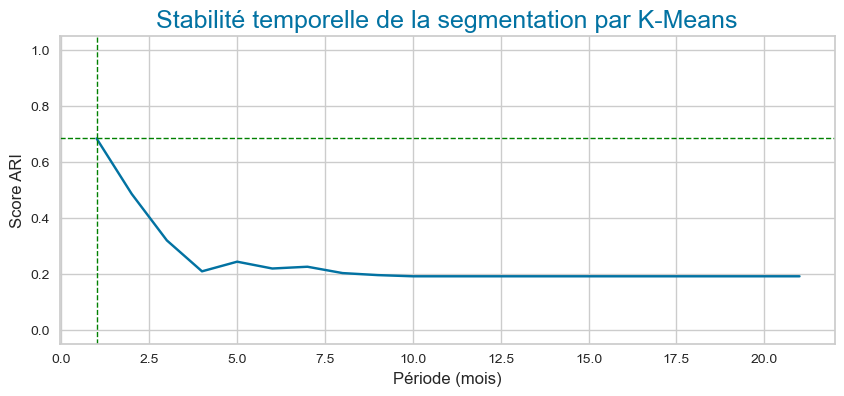

In [14]:
ari_score_1m = pd.DataFrame(ari_score_1m, columns = ["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize = (10, 4))
plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, (time_delta_1m + 1))
sns.lineplot(data = ari_score_1m, x = "periode", y = "ARI")
plt.axhline(y = ari_score_1m.iloc[0][1],
            linestyle = "--", 
            color = "green",
            #xmax = 0.43,
            linewidth = 1)
plt.axvline(x = ari_score_1m.iloc[0][0],
            linestyle = "--", 
            color = "green",
            #ymax = 1.1-(ari_score_1m.iloc[2][1]),
            linewidth = 1)
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize = 18,
          color = "b")
plt.show()

In [15]:
ari_score_1m.iloc[0]

periode    1.000000
ARI        0.683097
Name: 0, dtype: float64

##### Fréquence de MAJ => <b>1 mois</b>
--------------

#### <font color="#337da4" id="3.3"> 3.3. Chaque 2 semaines </font>
----------------------------

In [16]:
time_delta_2w = int((df_simulation.order_purchase_timestamp.max() - t_begin) / np.timedelta64(2, "W")) 

ari_score_2w = []
for p in range(2, (time_delta_2w * 2 + 1), 2) :
    
    stop_p = t_end + pd.DateOffset(weeks = p)
    data_p = df_simulation.loc[(t_begin <= df_simulation.order_purchase_timestamp) & (df_simulation.order_purchase_timestamp < stop_p)]
    
    rfm_p = rfms_maker(data_p, 'customer_unique_id', 'order_purchase_timestamp', 'payment_value','review_score')
    ## Filtrer les clients présents sur rfms_ref pour pouvoir comparer
    rfm_p = rfm_p[rfm_p.index.isin(rfms_ref.index)]   
    
    ## Réentraîner le modèle de référence
    preprocessor.fit_transform(rfms_ref)
    km_ref = KMeans(K, random_state=random_state).fit(rfms_ref)
    ## Prédire les nouvelles données sur le modèle de référence
    cluster_ref = km_ref.predict(rfm_p)
    
    ## Entraîner le nouveau modèle
    preprocessor.fit_transform(rfm_p)
    km_p = KMeans(K, random_state=random_state).fit(rfm_p)
    ## Etiquetage par le nouveau modèle
    cluster_p = km_p.labels_
    
    ## Calculate ARI score
    ari_p = adjusted_rand_score(cluster_ref, cluster_p)
    ari_score_2w.append([p, ari_p])

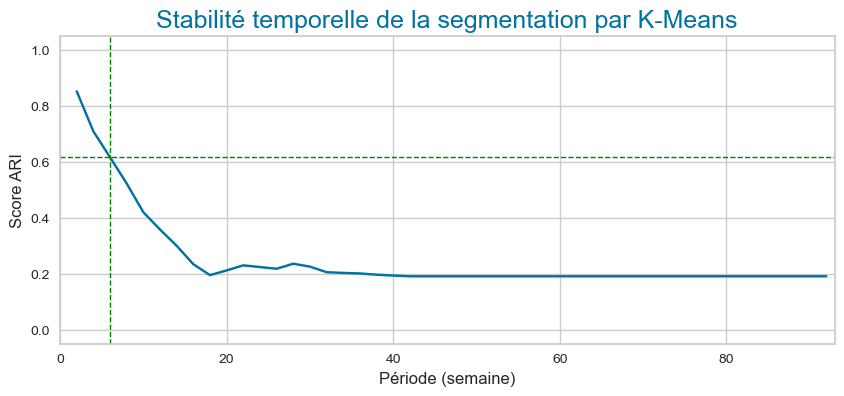

In [17]:
ari_score_2w = pd.DataFrame(ari_score_2w, columns = ["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize = (10, 4))
plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, (time_delta_2w * 2 + 1))
sns.lineplot(data = ari_score_2w, x = "periode", y = "ARI")
plt.axhline(y = ari_score_2w.iloc[2][1],
            linestyle = "--", 
            color = "green",
            #xmax = 0.43,
            linewidth = 1)
plt.axvline(x = ari_score_2w.iloc[2][0],
            linestyle = "--", 
            color = "green",
            #ymax = 1.1-(ari_score_2w.iloc[2][1]),
            linewidth = 1)
plt.xlabel("Période (semaine)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize = 18,
          color = "b")
plt.show()

In [18]:
ari_score_2w.iloc[2]

periode    6.000000
ARI        0.615812
Name: 2, dtype: float64

##### Fréquence de MAJ => <b> 6 semaines </b>
--------------

#### <font color="#337da4" id="3.3"> 3.4. Chaque semaine </font>
----------------------------

In [19]:
time_delta_1w = int((df_simulation.order_purchase_timestamp.max() - t_begin) / np.timedelta64(1, "W"))

ari_score_1w = []
for p in range(1, (time_delta_1w + 1)) :
    
    stop_p = t_end + pd.DateOffset(weeks = p)
    data_p = df_simulation.loc[(t_begin <= df_simulation.order_purchase_timestamp) & (df_simulation.order_purchase_timestamp < stop_p)]
    
    rfm_p = rfms_maker(data_p, 'customer_unique_id', 'order_purchase_timestamp', 'payment_value','review_score')
    ## Filtrer les clients présents sur rfms_ref pour pouvoir comparer
    rfm_p = rfm_p[rfm_p.index.isin(rfms_ref.index)]   
    
    ## Réentraîner le modèle de référence
    preprocessor.fit_transform(rfms_ref)
    km_ref = KMeans(K, random_state=random_state).fit(rfms_ref)
    ## Prédire les nouvelles données sur le modèle de référence
    cluster_ref = km_ref.predict(rfm_p)
    
    ## Entraîner le nouveau modèle
    preprocessor.fit_transform(rfm_p)
    km_p = KMeans(K, random_state=random_state).fit(rfm_p)
    ## Etiquetage par le nouveau modèle
    cluster_p = km_p.labels_
    
    ## Calculate ARI score
    ari_p = adjusted_rand_score(cluster_ref, cluster_p)
    ari_score_1w.append([p, ari_p])

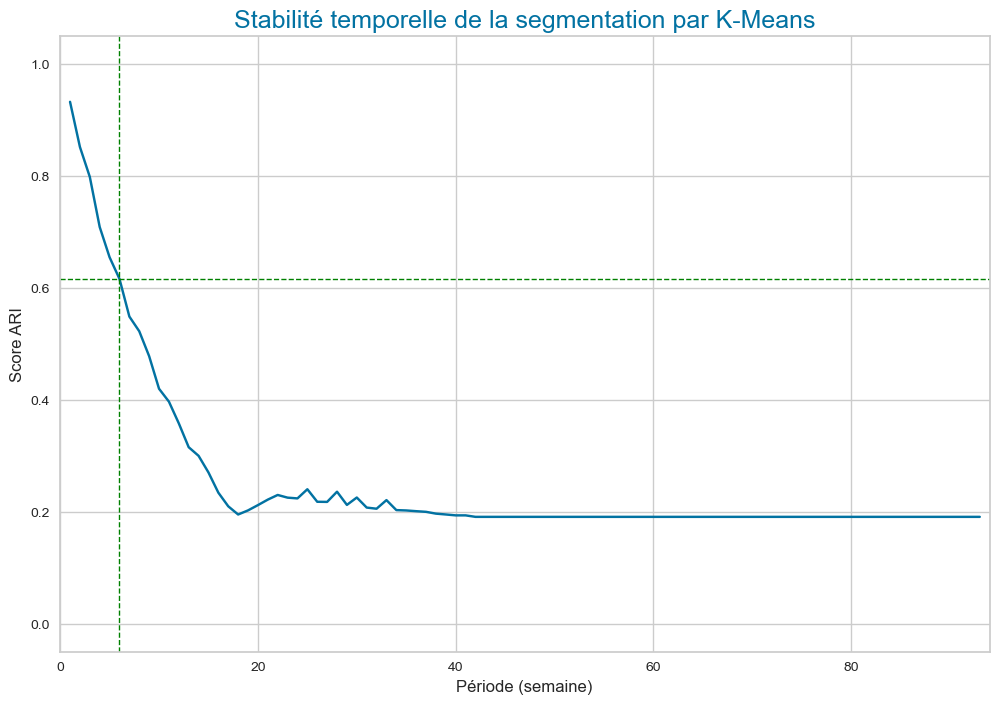

In [20]:
ari_score_1w = pd.DataFrame(ari_score_1w, columns = ["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize = (12, 8))
plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, (time_delta_1w + 1))
sns.lineplot(data = ari_score_1w, x = "periode", y = "ARI")
plt.axhline(y = ari_score_1w.iloc[5][1],
            linestyle = "--", 
            color = "green",
            #xmax = 0.43,
            linewidth = 1)
plt.axvline(x = ari_score_1w.iloc[5][0],
            linestyle = "--", 
            color = "green",
            #ymax = 1.1-(ari_score.iloc[2][1]),
            linewidth = 1)
plt.xlabel("Période (semaine)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize = 18,
          color = "b")
plt.show()

In [21]:
ari_score_1w.iloc[5]

periode    6.000000
ARI        0.615812
Name: 5, dtype: float64

##### Fréquence de MAJ => <b>6 semaines </b>
--------------

#### <font color="#337da4"> Conclusion </font>
----------------------------


AU regard des **différents résultats de simulation** la fréquence de mise à jour de notre modèle sera de **6 semaines**.